In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
customerDf = pd.read_csv("Mall_Customers.csv")
customerDf.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
customerDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
customerDf.describe(include = "all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


### Data Describtion
##### The dataset has no null values
##### Female customers are more than male by 12
##### Customers' age starts from 18 to 70, normally distrubuted with little right skewness and 65% of customer ages are between (24, 52)
##### Customers' annual income range is 15k to 137k "  "
##### Spending score rnage from 1 to 99 
#### From my POV all the values are valid and no need to further wranglin

In [6]:
customerDf = customerDf.rename({"CustomerID": "customer_id",
                                "Gender": "gender",
                                "Age": "age", 
                                "Annual Income (k$)": "annual_income", 
                                "Spending Score (1-100)": "spending_score"}, axis=1)

##### Renaming dataset columns

#### Discovering relationships

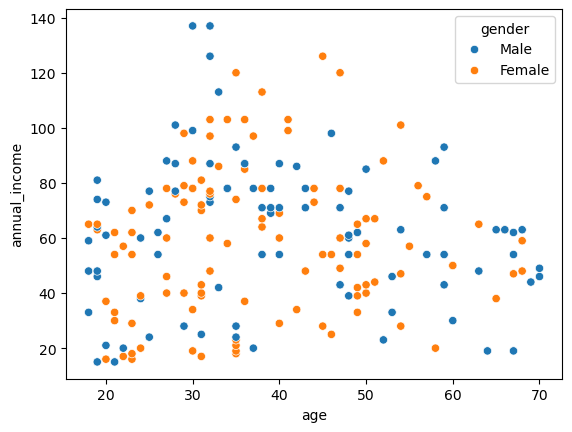

In [9]:
sns.scatterplot(y= customerDf["annual_income"], x= customerDf["age"], hue = customerDf["gender"]);

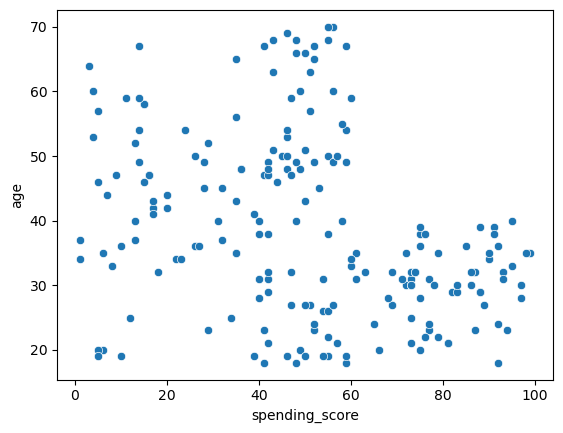

In [10]:
sns.scatterplot(y = customerDf["age"], x = customerDf["spending_score"]);

##### The highest spending scores are at the age less than 40

##### no relation ship between income, age or gender

<Axes: xlabel='annual_income', ylabel='spending_score'>

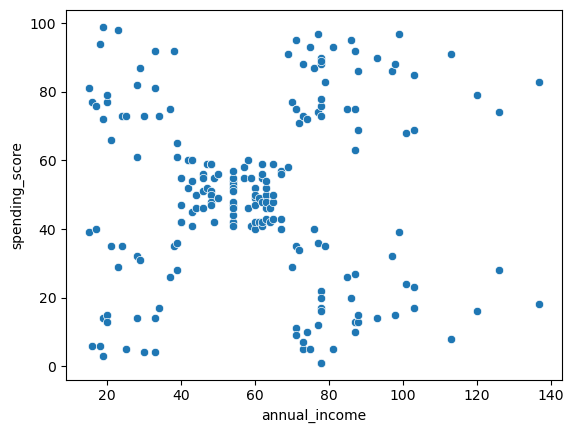

In [13]:
sns.scatterplot(x = customerDf["annual_income"], y = customerDf["spending_score"])

##### The data contain 5 clusters
1. Low Score, Low Income
2. Low Score, High Income
3. Mid Score, Mid Income
4. High Score, Low Income
5. High Score, High Income

### ML model

In [16]:
mlDF = customerDf[["annual_income", "spending_score"]].values

In [17]:
mlDF

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [18]:
scaler = StandardScaler()
scaledDF = scaler.fit_transform(mlDF)

#### Using Elbow Method to identfy best cluster number

In [36]:
inertia = []
cluster_number = range(2, 8)

for i in cluster_number:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaledDF)
    inertia.append(kmeans.inertia_)

C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

<Axes: >

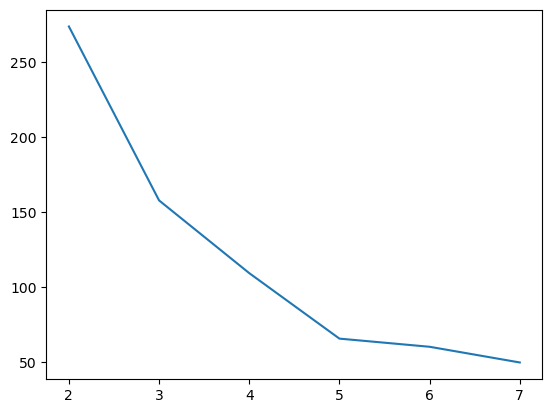

In [42]:
sns.lineplot(x=cluster_number, y=inertia)

### Based on the Elbow visual and scatter of "annual_income and spending_score" the best cluster number is 5

In [46]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit_transform(scaledDF)

C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[1.59136934, 3.20302576, 1.61959155, 2.92033087, 0.8241417 ],
       [1.96453204, 2.73093348, 0.41435257, 3.73598158, 2.37223989],
       [2.25920692, 3.99794559, 2.87218971, 2.78940569, 0.69990996],
       [1.84064438, 2.69976324, 0.38245529, 3.60549219, 2.21262088],
       [1.50773152, 3.11766122, 1.56404344, 2.8592051 , 0.82169642],
       [1.78706417, 2.66488413, 0.35779488, 3.55128873, 2.16784949],
       [2.20926223, 3.9469387 , 2.86332228, 2.71401132, 0.66003919],
       [2.23797979, 2.65636119, 0.64019646, 4.01109194, 2.85499997],
       [2.27611737, 4.01024202, 2.97565515, 2.69756035, 0.74921911],
       [1.63739998, 2.60771783, 0.38425828, 3.39362443, 2.00277613],
       [1.95465594, 3.69334368, 2.55047711, 2.64409006, 0.38698347],
       [2.36841727, 2.65981256, 0.80439857, 4.13306168, 3.04425126],
       [1.90021642, 3.6389014 , 2.50824135, 2.60444877, 0.33256467],
       [1.71850934, 2.54752609, 0.23708397, 3.49018279, 2.19063962],
       [1.95574645, 3.69490341, 2.

In [48]:
y_predict = kmeans5.fit_predict(scaledDF)

C:\Users\PanDa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [58]:
print(y_predict)
print(kmeans5.labels_)
print((y_predict == kmeans5.labels_).all())

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
True


In [60]:
kmeans5.score(scaledDF)

-65.56840815571681

##### means: there is a variation within-cluster = 65.56

#### Visualizing all the clusters 

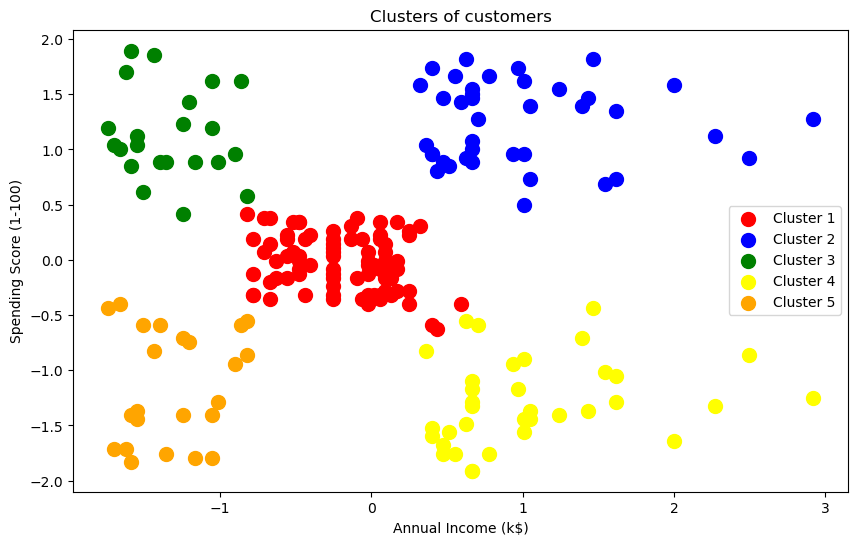

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(scaledDF[y_predict == 0, 0], scaledDF[y_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaledDF[y_predict == 1, 0], scaledDF[y_predict == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaledDF[y_predict == 2, 0], scaledDF[y_predict == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaledDF[y_predict == 3, 0], scaledDF[y_predict == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(scaledDF[y_predict == 4, 0], scaledDF[y_predict == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()